In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

C:\Users\arrag\AppData\Local\Temp\ipykernel_19640\1172737160.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## DATA RAPRESENTETION

In [3]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
wine_dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.51,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataframe.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
#wdf=wine_dataframe.copy()
#scaler = StandardScaler()
# Seleziona tutte le colonne tranne quality
#cols_to_standardize = wdf.columns.difference(['quality'])
# Calcola la z-score per le colonne selezionate
#wdf[cols_to_standardize] = scaler.fit_transform(wdf[cols_to_standardize])


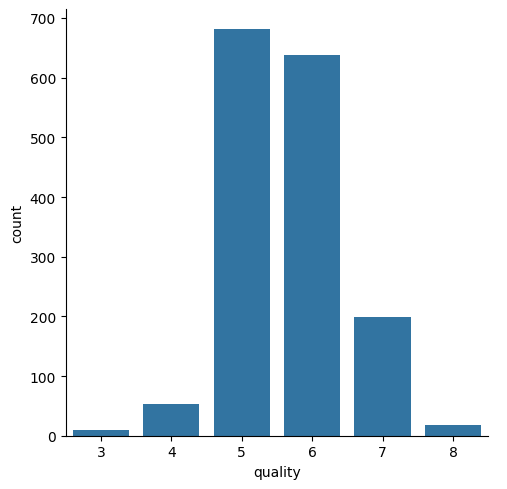

In [5]:
sns.catplot(x='quality',data=wine_dataframe, kind='count')
plt.show()

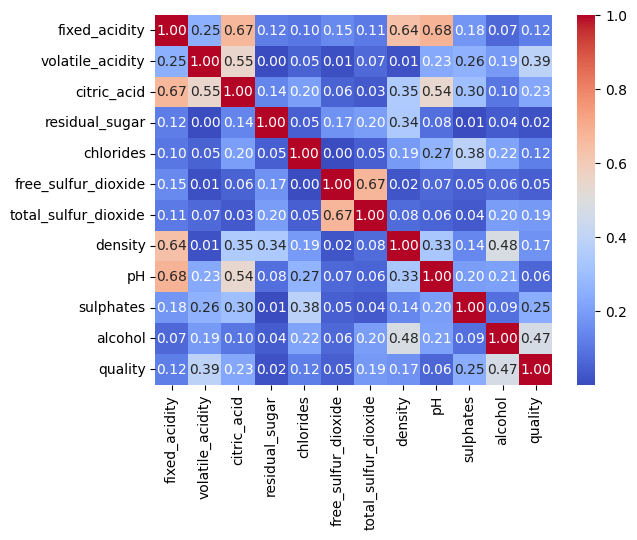

In [6]:
corr_matrix = wine_dataframe.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [7]:
wine_feature=corr_matrix['quality']
wine_feature.drop(['quality'], inplace=True)

In [8]:
moderate_corr=[]
weak_corr=[]
no_corr=[]

for i in range(len(wine_feature)):
    if wine_feature.iloc[i] > 0.389 :
        moderate_corr.append(wine_feature.index[i])
    elif wine_feature.iloc[i] > 0.189 :
        weak_corr.append(wine_feature.index[i])
    else:
        no_corr.append(wine_feature.index[i])



In [20]:
print('Feature with moderate correlation with quality:',moderate_corr)
print('Feature with weak correlation with quality:',weak_corr)
print('Feature with no correlation with quality:',no_corr)

Feature with moderate correlation with quality: ['volatile_acidity', 'alcohol']
Feature with weak correlation with quality: ['citric_acid', 'sulphates']
Feature with no correlation with quality: ['fixed_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH']


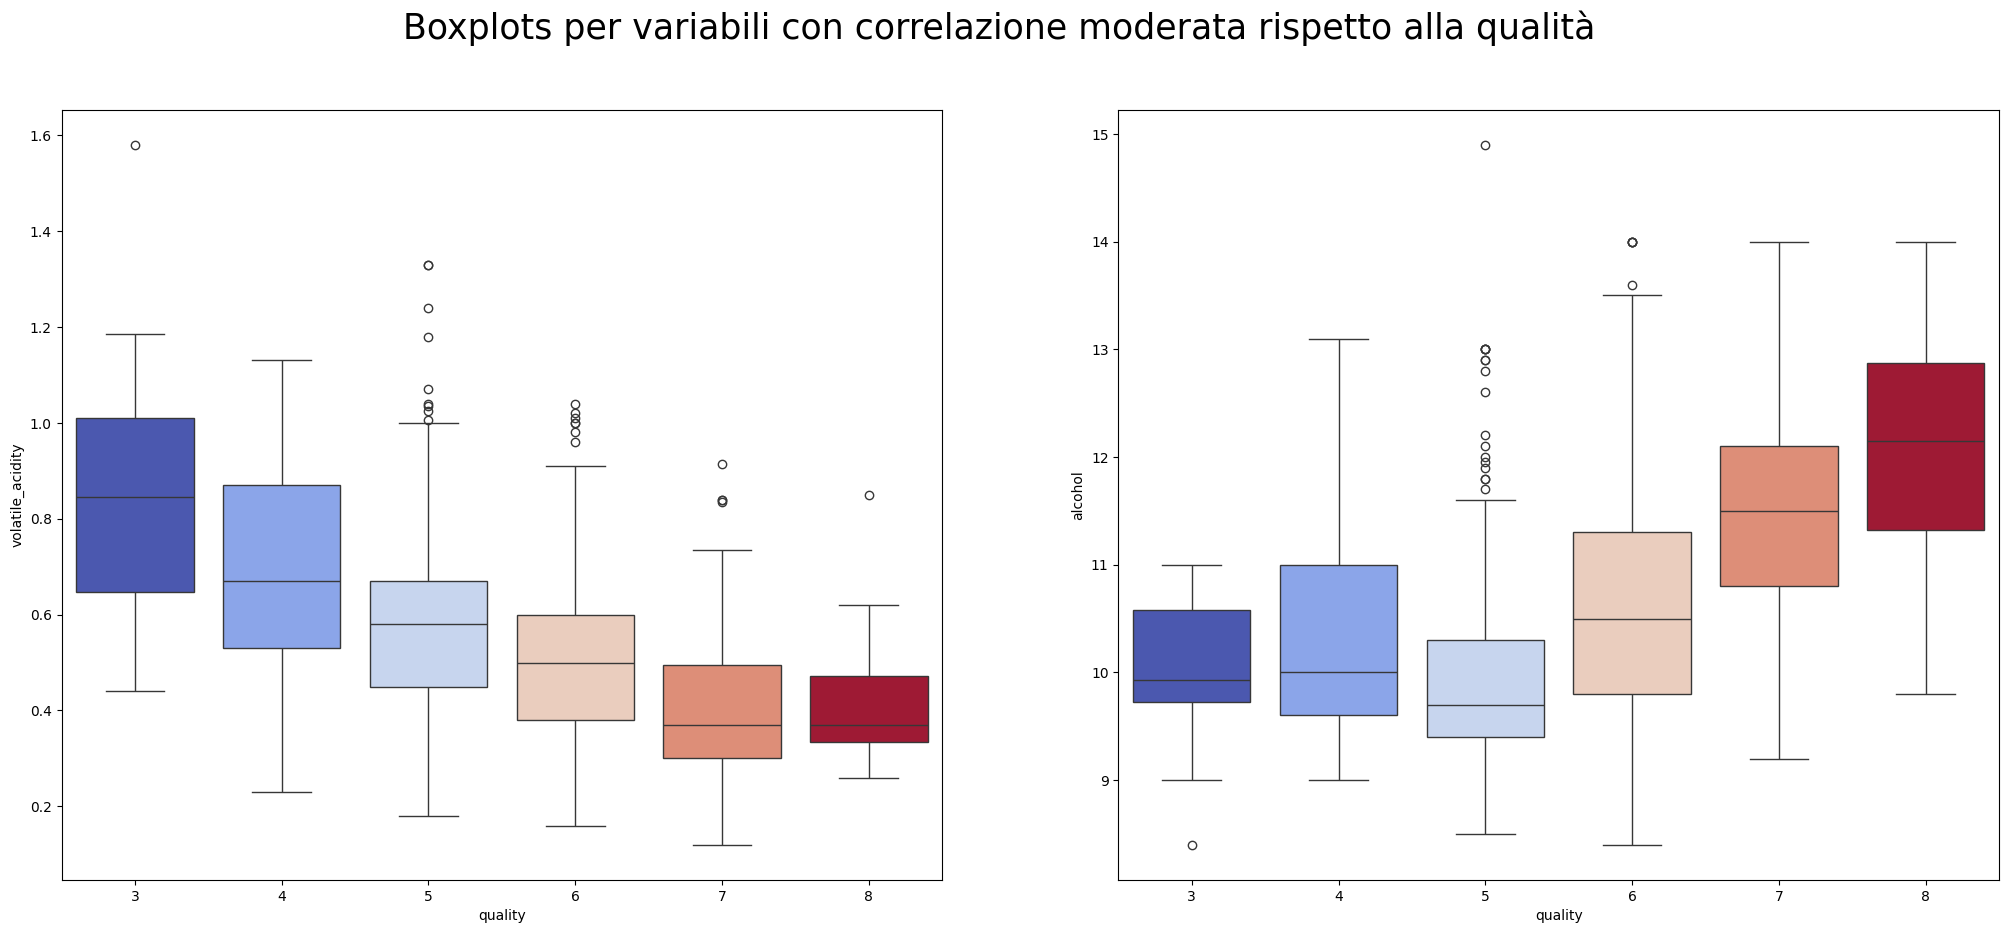

In [47]:
fig, ax = plt.subplots(1,2,figsize =(25,10))
for i in range(len(moderate_corr)):
    sns.boxplot(x='quality', y=moderate_corr[i], hue='quality', data = wine_dataframe, ax=ax[i], palette = 'coolwarm', legend=False)
fig.suptitle('Boxplots per variabili con correlazione moderata rispetto alla qualità', fontsize=25)
plt.show()

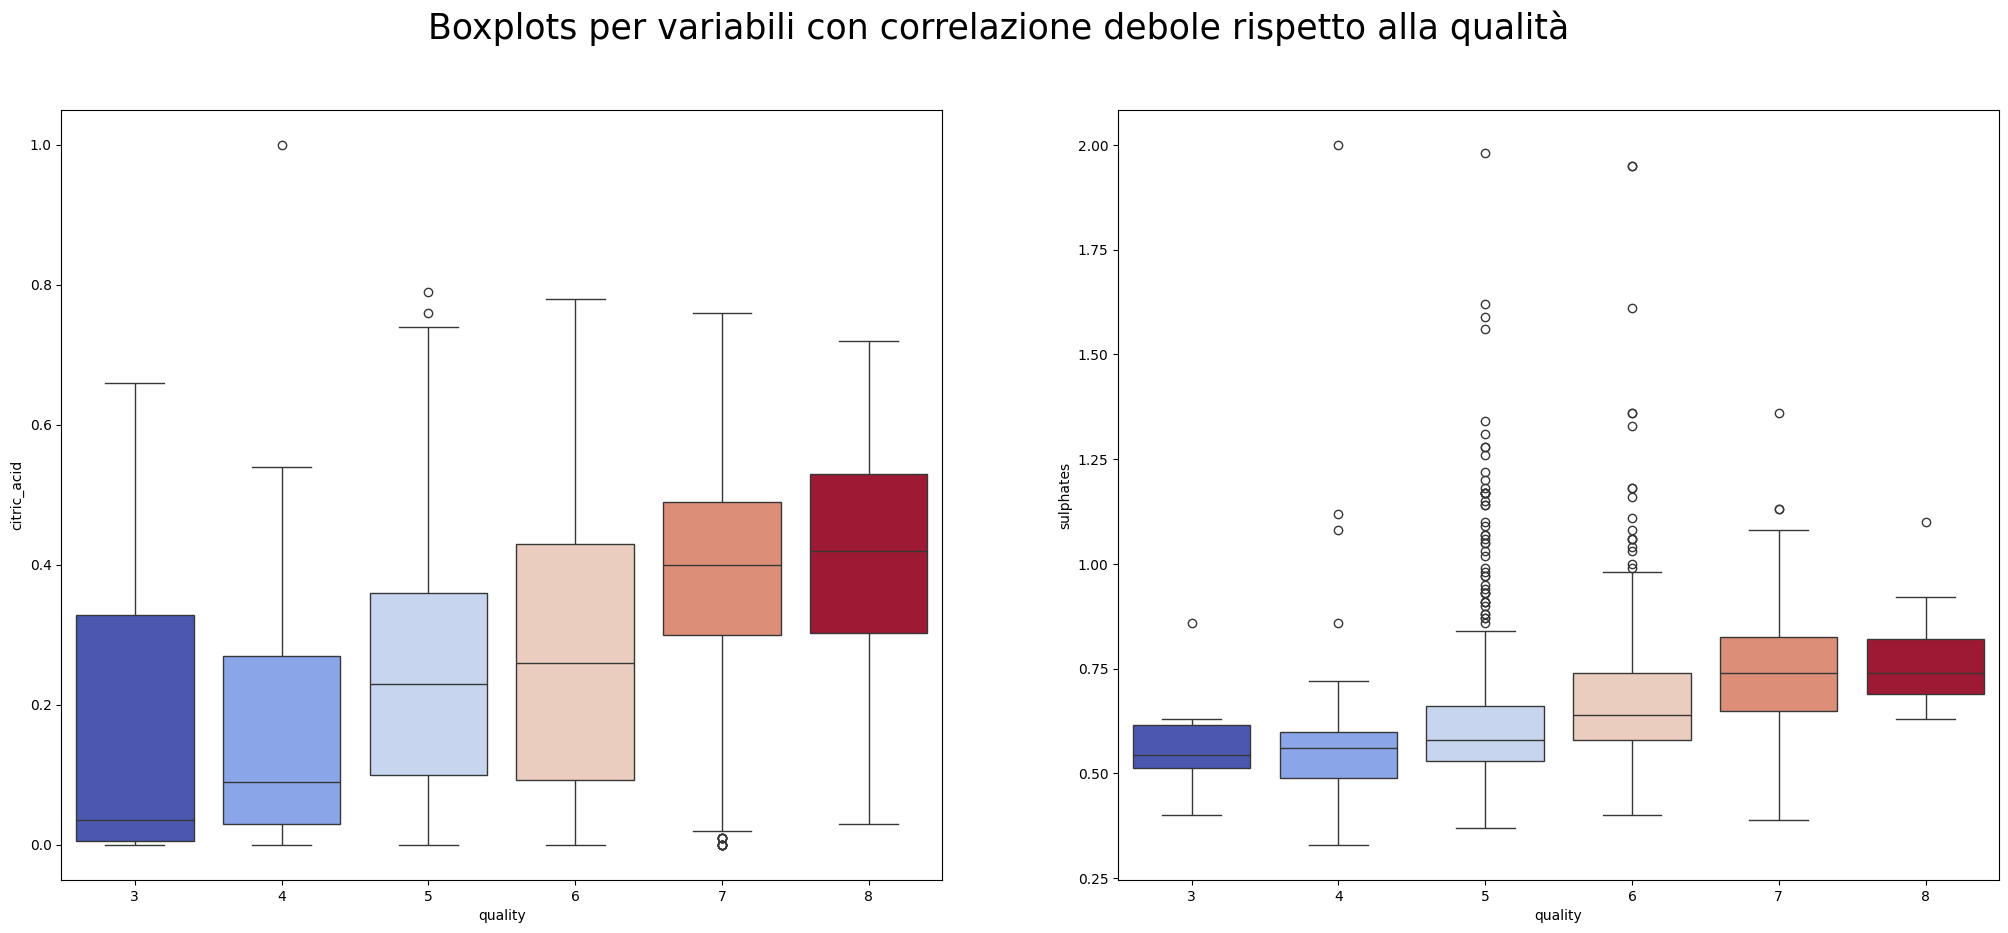

In [46]:
fig, ax = plt.subplots(1,2,figsize =(25,10))
for i in range(len(weak_corr)):
    sns.boxplot(x='quality', y=weak_corr[i], hue='quality', data = wine_dataframe, ax=ax[i], palette = 'coolwarm', legend=False)
fig.suptitle('Boxplots per variabili con correlazione debole rispetto alla qualità', fontsize=25)
plt.show()

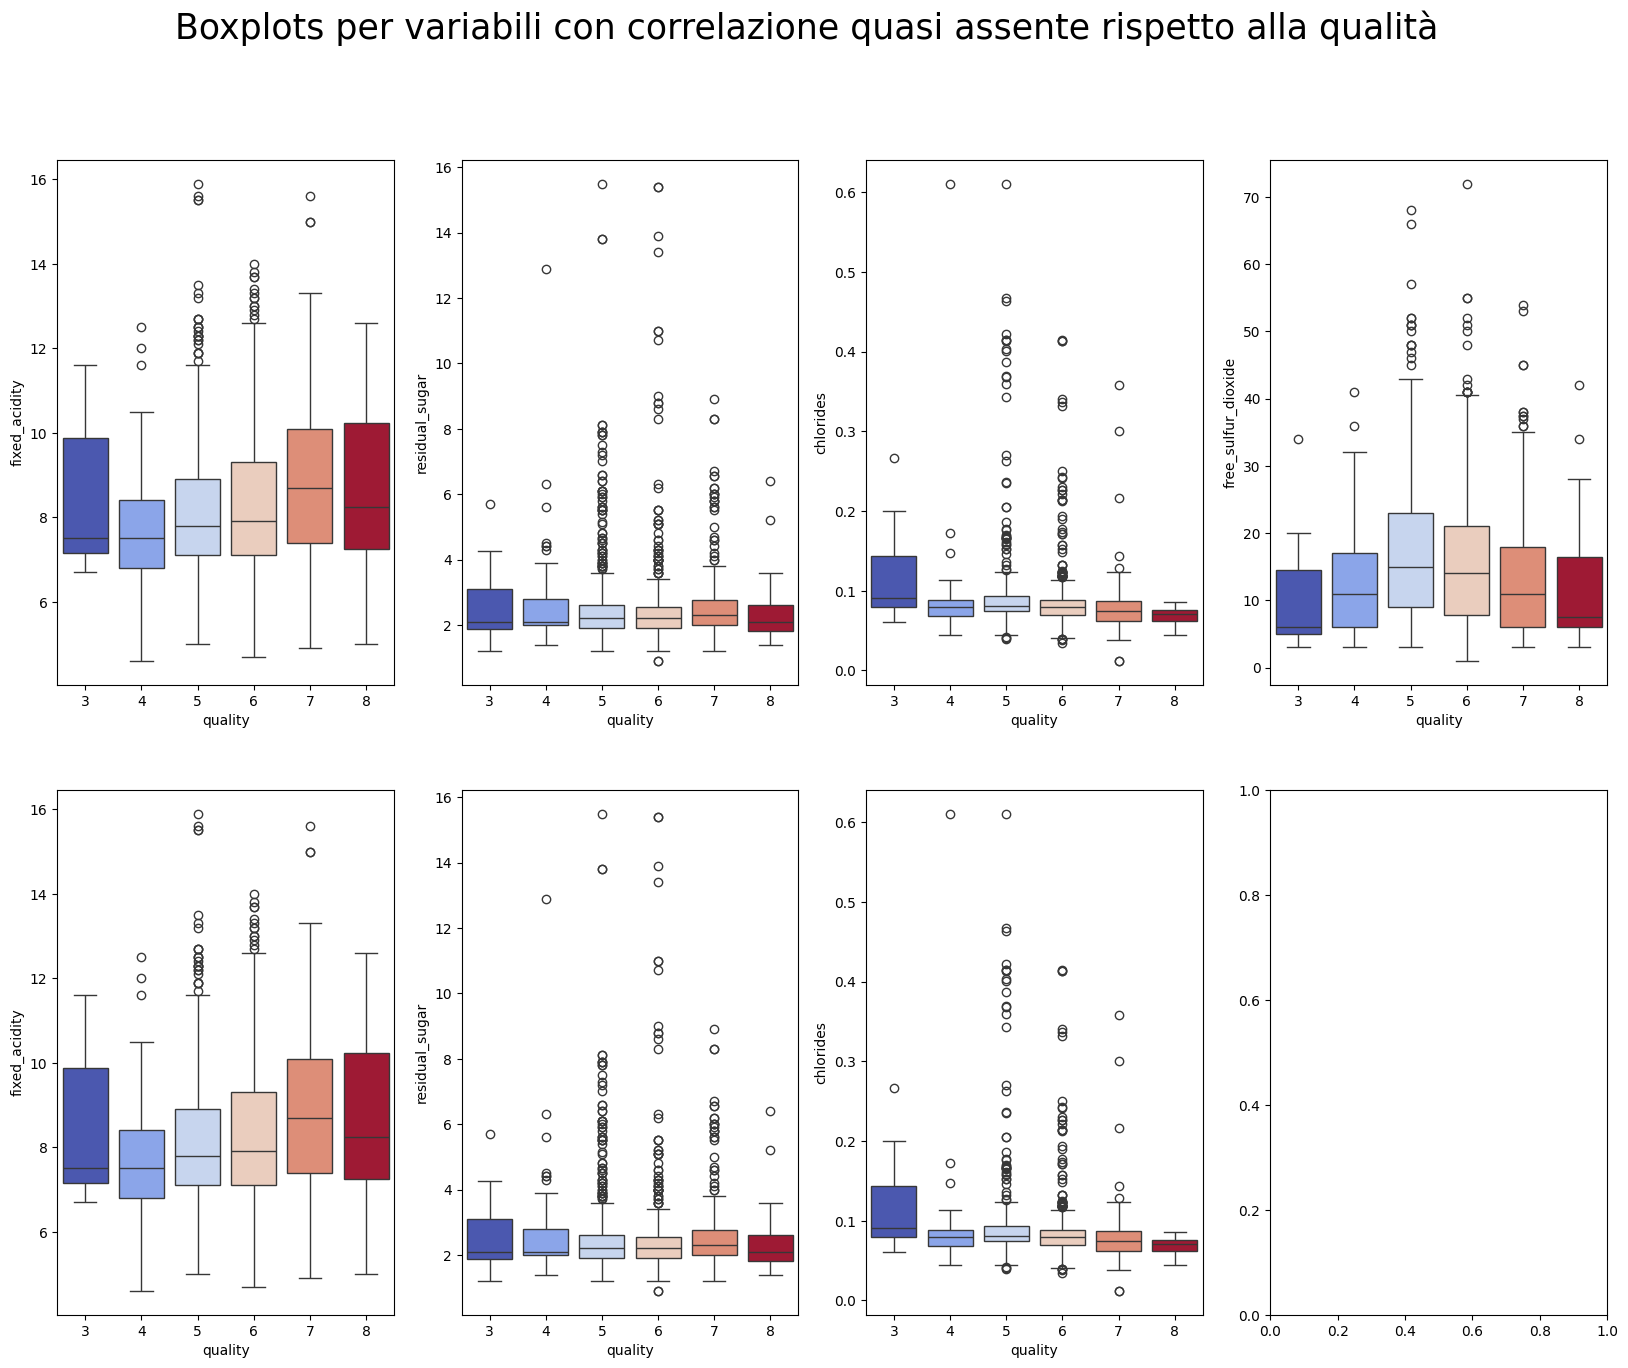

In [48]:
fig, ax = plt.subplots(2,4,figsize=(20,15))
a=0
for i in range(len(no_corr)):
    if i >3:
        a=1
        i=i-4
    sns.boxplot(x='quality', y=no_corr[i], hue='quality', data = wine_dataframe, ax=ax[a,i], palette = 'coolwarm', legend=False)

fig.suptitle('Boxplots per variabili con correlazione quasi assente rispetto alla qualità', fontsize=25)
plt.show()